<a href="https://colab.research.google.com/github/vieduy/CS114.K21/blob/master/IR_Categories_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import library

In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import fetch_20newsgroups

## Download dataset 20newsgroups

In [3]:
# We defined the categories which we want to classify
categories = ['rec.motorcycles', 'sci.electronics',
              'comp.graphics', 'sci.med', 'alt.atheism', 'comp.os.ms-windows.misc', 
              'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 
              'misc.forsale', 'rec.autos', 'rec.sport.baseball',
              'rec.sport.hockey', 'sci.crypt', 'sci.space', 'soc.religion.christian', 'talk.politics.guns',
              'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

# sklearn provides us with subset data for training and testing
train_data = fetch_20newsgroups(subset='train',
                                categories=categories, shuffle=True, random_state=42)

## Define stopwords and punctuation

In [4]:
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuation = list(punctuation)
print(punctuation)
stop.update(punctuation)
stop.remove('i')
print(stop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
{'o', 'at', 've', 'until', 'my', '"', 'herself', 'out', "'", 'by', 'most', 'isn', 'am', 'as', 'ain', 'this', 'mustn', '%', 'him', 'here', 'mightn', 'what', 'y', 'than', "you'll", 'doesn', 'been', '\\', '^', "doesn't", 'each', 'now', 'an', 'you', 'where', 'do', "shouldn't", "haven't", ']', 'nor', 'that', 'me', "don't", '@', 'is', 't', 'm', 'in', '#', 'ourselves', 'some', 'own', 'needn', 'shouldn', 'these', 'which', '=', 'more', 'if', 'both', "it's", '-', 'be', 'to', 'just', 'll', 'can', 'because', 'd', '_', '{', 'on', "won't", 'only', 'how', 'down', 's', 'was', 'myself', 'them', '!', "didn't", '?', 'it

In [6]:
from nltk.stem import PorterStemmer
import re
ps = PorterStemmer()

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in split(text):
        if i.strip().lower() not in punctuation:
            final_text.append(ps.stem(i.strip()))
    return "".join(final_text)

## Remove stopwords and punctuation and build vocabulary

In [7]:
def split(word): 
    return [char for char in word] 

vocab = set()

#Apply function on review column
for doc in train_data.data:
  doc = doc.split(' ')
  d = 0
  for doc_i in doc:
    doc_i = remove_stopwords(doc_i)
    if len(doc_i) < 25:
      vocab.update(set([doc_i]))

In [27]:
new_vocab = list(vocab)
print(len(vocab))
print(new_vocab[:2000])

255530
['', 'bucks', 'Motto', '27695', 'exitingan', 'HackersLines', '60Hz', 'JOV2UPDX5', 'helpOh', 'againThe', 'aliveand', 'weaselwordsto', 'lunchReplyTo', 'Ribbon', 'bengcaewiscedu', 'thatclass', 'usaWhile', 'hubris', 'GRAYSCALE', 'AGL', 'AltheimSubject', 'cit', 'mkaomaceccpurdueedu', 'reviewing', 'landBecause', 'addcsstandacuk', 'above16M', 'builtaround', 'comfortableThese', '2500Story', 'stony', 'antihistamines', 'strappedon', '10K', 'Compulsive', 'outVanbiesbroucks', 'acurracy', '196670', 'combinedor', 'timeNow', 'ReturnPath', 'canWhy', 'dAmbrosio', 'iscruel', 'Khrushchev', 'scarier', 'faithyou', 'LawAre', 'supportingdevelopment', 'exegetical', 'elsesAmir', 'believeIn', 'NUHow', 'refinement', 'thebeam', 'MicrobiologyOSU', 'eds', 'publishedstatistics', 'theperpetrator', 'thecue', 'locationfor', 'Spin', 'jetting', 'viaan', 'repectable', 'kinesis2gif', 'isaround', 'aovaiqubeocunixonca', 'UK', 'PMIO', 'UNIXPCstyle', 'Jurisdiction', 'blabandy', 'DepartmentReplyTo', 'VNET', 'adecisive', 

## Vectorize documents in training set by TF-IDF with vocab len 2000 words

In [15]:
# Builds a dictionary of features and transforms documents to feature vectors and convert our text documents to a
# matrix of token counts (CountVectorizer)
count_vect = CountVectorizer(vocabulary=new_vocab)
X_train_counts = count_vect.fit_transform(train_data.data)

# transform a count matrix to a normalized tf-idf representation (tf-idf transformer)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [16]:
print(X_train_tfidf.shape)

(11314, 2000)


## Create model Naive Bayes for documents classification and training

In [17]:
from sklearn.naive_bayes import MultinomialNB

gnb = MultinomialNB()
gnb.fit(X_train_tfidf, train_data.target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Create KNN model for docs classification and training

In [19]:
knn = KNeighborsClassifier(n_neighbors=7)

# training our classifier ; train_data.target will be having numbers assigned for each category in train data
knn.fit(X_train_tfidf, train_data.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

## Test some sentences

In [21]:
# Input Data to predict their classes of the given categories
docs_new = ['I have a NASA spaceship', 'I have a GTX 1050 GPU']
# building up feature vector of our input
X_new_counts = count_vect.transform(docs_new)
# We call transform instead of fit_transform because it's already been fit
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

In [23]:
predicted = knn.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, train_data.target_names[category]))

'I have a NASA spaceship' => alt.atheism
'I have a GTX 1050 GPU' => alt.atheism


## Test with test set

In [51]:
text_clf = Pipeline([
    ('vect', CountVectorizer(vocabulary=new_vocab)),
    ('tfidf', TfidfTransformer()),
    ('clf', gnb),
])
# Fitting our train data to the pipeline
text_clf.fit(train_data.data, train_data.target)

# Test data 
test_data = fetch_20newsgroups(subset='test',
                               categories=categories, shuffle=True, random_state=42)
docs_test = test_data.data
# Predicting our test data
predicted = text_clf.predict(docs_test)
print('We got an accuracy of',np.mean(predicted == test_data.target)*100, '% over the test data.')

We got an accuracy of 75.49123738714817 % over the test data.


In [28]:
accuracy = []
for num_words in range(2000, 255530, 30000):
  text_clf = Pipeline([
    ('vect', CountVectorizer(vocabulary=new_vocab[:num_words])),
    ('tfidf', TfidfTransformer()),
    ('clf', knn),
])
  text_clf.fit(train_data.data, train_data.target)
  predicted = text_clf.predict(docs_test)
  accuracy.append(np.mean(predicted == test_data.target)*100)

In [37]:
accuracy_nb = []
for num_words in range(2000, 255530, 30000):
  text_clf = Pipeline([
    ('vect', CountVectorizer(vocabulary=new_vocab[:num_words])),
    ('tfidf', TfidfTransformer()),
    ('clf', gnb),
])
  text_clf.fit(train_data.data, train_data.target)
  predicted = text_clf.predict(docs_test)
  accuracy_nb.append(np.mean(predicted == test_data.target)*100)

In [30]:
num_word = []
for num_words in range(2000, 255530, 30000):
  num_word.append(num_words)

## Performance of KNN and Naive Bayes depend on vocab length

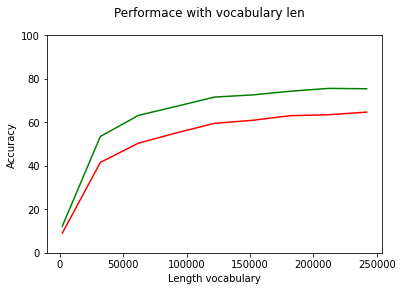

In [50]:
import matplotlib.pyplot as plt

plt.suptitle('Performace with vocabulary len')
plt.xlabel('Length vocabulary')
plt.ylabel('Accuracy')
plt.ylim(0, 100) 
plt.plot(num_word, accuracy, label = 'KNN', color='red')
plt.plot(num_word, accuracy_nb, label = 'Naive Bayes', color='green')